In [1]:
import sys

sys.path.append("C:\\Users\\Gabija\\anaconda3\\Lib\\site-packages")
import nb_black

%load_ext nb_black

<IPython.core.display.Javascript object>

In [22]:
from IPython.display import Image
import myfunctions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from csv import QUOTE_NONNUMERIC, QUOTE_NONE

%matplotlib inline
import warnings


from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    accuracy_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from IPython.display import Audio

sound_file = "button-13.wav"
set_config(transform_output="pandas")

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("Setup complete")

Setup complete


<IPython.core.display.Javascript object>

## Credit CARD Balance Table Analysis

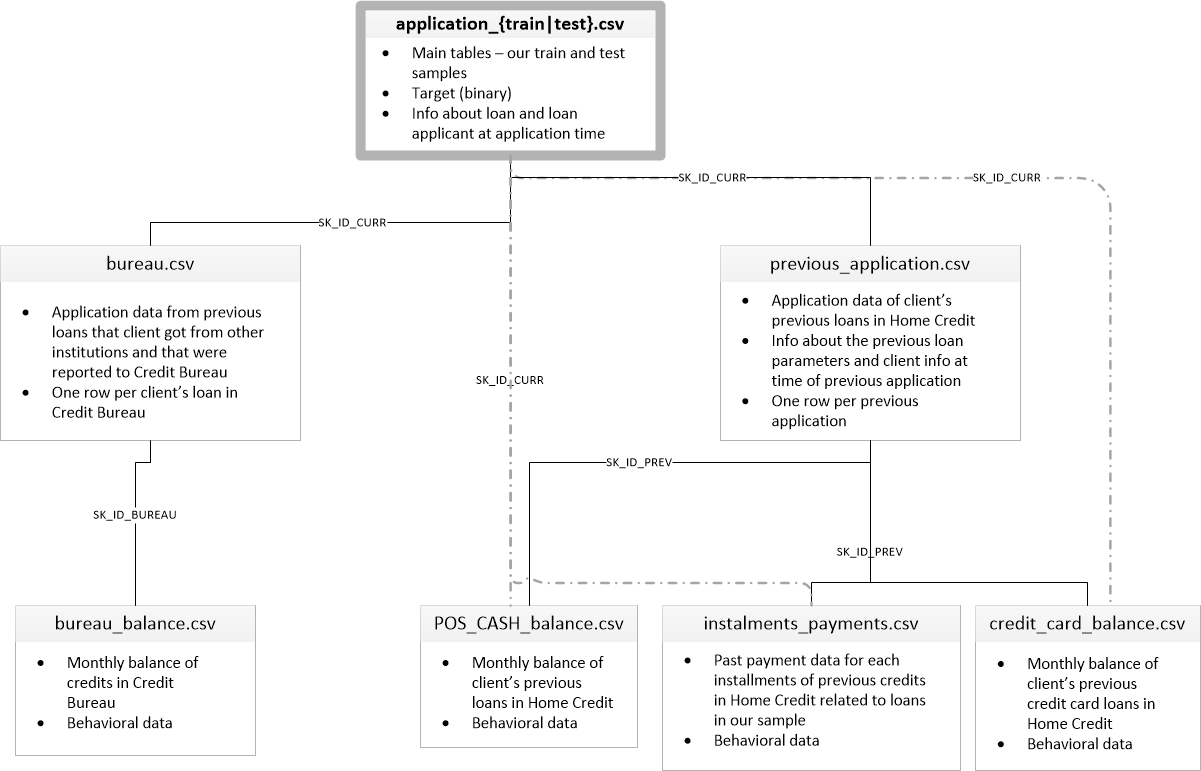

<IPython.core.display.Javascript object>

In [4]:
Image(filename="home_credit.png")

In [5]:
columns_description = pd.read_csv(
    "HomeCredit_columns_description.csv",
    encoding="latin-1",
    usecols=["Table", "Row", "Description"],
)
columns_description.style.set_properties(subset=["Description"], **{"width": "1000px"})

,Table,Row,Description
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample
1,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,application_{train|test}.csv,CODE_GENDER,Gender of the client
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car
5,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has
7,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client
8,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan
9,application_{train|test}.csv,AMT_ANNUITY,Loan annuity


<IPython.core.display.Javascript object>

* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample

In [3]:
ccb = pd.read_csv("credit_card_balance.csv")
ccb = myfunctions.reduce_mem_usage(ccb)
print("Size of credit_card_balance table", ccb.shape)
ccb.head()

Size of credit_card_balance table (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,1800.0,1800.0,0.000000,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,2250.0,2250.0,60175.078125,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,2250.0,2250.0,26926.425781,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,11925.0,11925.0,224949.281250,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,27000.0,27000.0,443044.406250,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


<IPython.core.display.Javascript object>

In [7]:
ccb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int32  
 1   SK_ID_CURR                  int32  
 2   MONTHS_BALANCE              int8   
 3   AMT_BALANCE                 float32
 4   AMT_CREDIT_LIMIT_ACTUAL     int32  
 5   AMT_DRAWINGS_ATM_CURRENT    float32
 6   AMT_DRAWINGS_CURRENT        float32
 7   AMT_DRAWINGS_OTHER_CURRENT  float32
 8   AMT_DRAWINGS_POS_CURRENT    float32
 9   AMT_INST_MIN_REGULARITY     float32
 10  AMT_PAYMENT_CURRENT         float32
 11  AMT_PAYMENT_TOTAL_CURRENT   float32
 12  AMT_RECEIVABLE_PRINCIPAL    float32
 13  AMT_RECIVABLE               float32
 14  AMT_TOTAL_RECEIVABLE        float32
 15  CNT_DRAWINGS_ATM_CURRENT    float16
 16  CNT_DRAWINGS_CURRENT        int16  
 17  CNT_DRAWINGS_OTHER_CURRENT  float16
 18  CNT_DRAWINGS_POS_CURRENT    float16
 19  CNT_INSTALMENT_MATURE

<IPython.core.display.Javascript object>

In [8]:
ccb.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'NAME_CONTRACT_STATUS',
 'SK_DPD',
 'SK_DPD_DEF']

<IPython.core.display.Javascript object>

In [10]:
numeric_columns = [
    "MONTHS_BALANCE",
    "AMT_BALANCE",
    "AMT_CREDIT_LIMIT_ACTUAL",
    "AMT_DRAWINGS_ATM_CURRENT",
    "AMT_DRAWINGS_CURRENT",
    "AMT_DRAWINGS_OTHER_CURRENT",
    "AMT_DRAWINGS_POS_CURRENT",
    "AMT_INST_MIN_REGULARITY",
    "AMT_PAYMENT_CURRENT",
    "AMT_PAYMENT_TOTAL_CURRENT",
    "AMT_RECEIVABLE_PRINCIPAL",
    "AMT_RECIVABLE",
    "AMT_TOTAL_RECEIVABLE",
    "CNT_DRAWINGS_ATM_CURRENT",
    "CNT_DRAWINGS_CURRENT",
    "CNT_DRAWINGS_OTHER_CURRENT",
    "CNT_DRAWINGS_POS_CURRENT",
    "CNT_INSTALMENT_MATURE_CUM",
    "SK_DPD",
    "SK_DPD_DEF",
]
categorical_columns = ["NAME_CONTRACT_STATUS"]

<IPython.core.display.Javascript object>

In [20]:
ccb.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3090496.0,3.840312e+06,3090496.0,3090496.0,3535076.0,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961323e+03,7.433390e+03,2.881696e+02,2.968804e+03,3.540206e+03,1.028054e+04,7.588856e+03,5.596585e+04,5.808884e+04,5.809825e+04,NaN,7.031439e-01,0.0,NaN,NaN,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607809e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,0.0,3.190347e+00,0.0,0.0,0.0,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,4.0,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,15.0,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.0,0.000000e+00,0.0,0.0,32.0,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289208e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,51.0,1.650000e+02,12.0,165.0,120.0,3.260000e+03,3.260000e+03


<IPython.core.display.Javascript object>

In [21]:
myfunctions.single_value_features(ccb)

[]

<IPython.core.display.Javascript object>

In [22]:
myfunctions.missing_values_summary(ccb)

There are 9 columns that have missing values.


,Missing Values,% of Total Values,type
AMT_PAYMENT_CURRENT,767988,19.9981,float32
AMT_DRAWINGS_ATM_CURRENT,749816,19.5249,float32
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5249,float32
AMT_DRAWINGS_POS_CURRENT,749816,19.5249,float32
CNT_DRAWINGS_ATM_CURRENT,749816,19.5249,float16
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5249,float16
CNT_DRAWINGS_POS_CURRENT,749816,19.5249,float16
AMT_INST_MIN_REGULARITY,305236,7.9482,float32
CNT_INSTALMENT_MATURE_CUM,305236,7.9482,float16


<IPython.core.display.Javascript object>

In [29]:
# single client example:
ccb[ccb["SK_ID_PREV"] == 2582071]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.000000,0.0,0.000000,2250.0,2250.000000,2250.0,60175.078125,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
32636,2582071,363914,-82,16809.210938,67500,0.0,0.000000,0.0,0.000000,3375.0,9000.000000,9000.0,15488.684570,16809.210938,16809.210938,0.0,0,0.0,0.0,18.0,Active,0,0
38922,2582071,363914,-84,27577.890625,67500,0.0,0.000000,0.0,0.000000,3375.0,4500.000000,4500.0,26125.019531,27577.890625,27577.890625,0.0,0,0.0,0.0,16.0,Active,0,0
104903,2582071,363914,-7,65159.234375,45000,0.0,0.000000,0.0,0.000000,2250.0,2250.000000,2250.0,60301.171875,65609.234375,65609.234375,0.0,0,0.0,0.0,63.0,Active,0,0
110618,2582071,363914,-59,70475.851562,67500,24750.0,24750.000000,0.0,0.000000,3375.0,4500.000000,4500.0,63975.015625,70475.851562,70475.851562,4.0,4,0.0,0.0,41.0,Active,0,0
126253,2582071,363914,-34,0.000000,67500,0.0,0.000000,0.0,0.000000,0.0,63.855000,0.0,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,60.0,Active,0,0
204994,2582071,363914,-54,68278.273438,67500,0.0,0.000000,0.0,0.000000,3375.0,4500.000000,4500.0,63130.410156,68278.273438,68278.273438,0.0,0,0.0,0.0,46.0,Active,0,0
344182,2582071,363914,-55,67630.406250,67500,0.0,0.000000,0.0,0.000000,3375.0,4500.000000,4500.0,65479.996094,67630.406250,67630.406250,0.0,0,0.0,0.0,45.0,Active,0,0
360361,2582071,363914,-58,66873.914062,67500,2250.0,2250.000000,0.0,0.000000,3375.0,9000.000000,9000.0,63725.851562,66873.914062,66873.914062,1.0,1,0.0,0.0,42.0,Active,0,0
439957,2582071,363914,-75,19778.400391,67500,0.0,0.000000,0.0,0.000000,3375.0,9000.000000,9000.0,18435.960938,19778.400391,19778.400391,0.0,0,0.0,0.0,25.0,Active,0,0


<IPython.core.display.Javascript object>

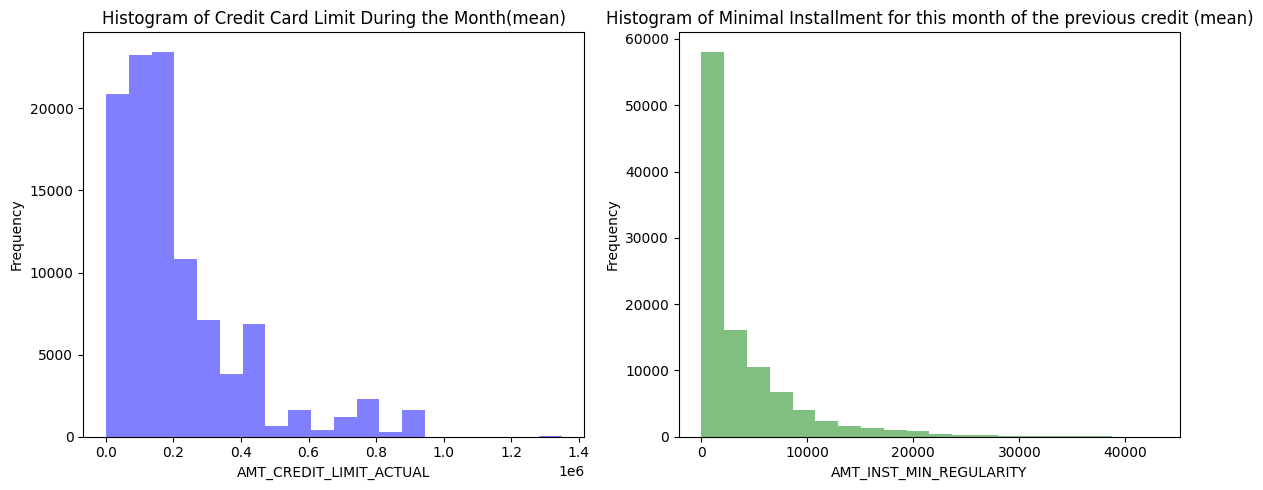

<IPython.core.display.Javascript object>

In [47]:
grouped = (
    ccb.groupby(["SK_ID_CURR", "SK_ID_PREV"])[
        ["AMT_CREDIT_LIMIT_ACTUAL", "AMT_INST_MIN_REGULARITY"]
    ]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(grouped["AMT_CREDIT_LIMIT_ACTUAL"], bins=20, alpha=0.5, color="b")
plt.xlabel("AMT_CREDIT_LIMIT_ACTUAL")
plt.ylabel("Frequency")
plt.title("Histogram of Credit Card Limit During the Month(mean)")

plt.subplot(1, 2, 2)
plt.hist(grouped["AMT_INST_MIN_REGULARITY"], bins=20, alpha=0.5, color="g")
plt.xlabel("AMT_INST_MIN_REGULARITY")
plt.ylabel("Frequency")
plt.title(
    "Histogram of Minimal Installment for this month of the previous credit (mean)"
)

plt.tight_layout()
plt.show()

In [48]:
ccb["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [4]:
transformer = ColumnTransformer(
    transformers=[
        (
            "encode",
            OneHotEncoder(sparse=False),
            ["NAME_CONTRACT_STATUS"],
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)
ccb = transformer.fit_transform(ccb)
ccb = ccb.rename(columns=lambda x: re.sub("[^A-Za-z0-9_]+", "", x))
ccb = myfunctions.reduce_mem_usage(ccb)

<IPython.core.display.Javascript object>

In [50]:
ccb.head()

,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sentproposal,NAME_CONTRACT_STATUS_Signed,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,1800.0,1800.0,0.000000,0.000000,0.000000,0.0,1,0.0,1.0,35.0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,2250.0,2250.0,60175.078125,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,2250.0,2250.0,26926.425781,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,11925.0,11925.0,224949.281250,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,27000.0,27000.0,443044.406250,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,0,0


<IPython.core.display.Javascript object>

In [5]:
# create additional features:
transform_ccb = FunctionTransformer(myfunctions.ccb_active_features)
aggregate_ccb = Pipeline(steps=[("aggregate_new", transform_ccb)])
ccb_agg = aggregate_ccb.fit_transform(ccb)
print(ccb_agg.shape)
ccb_agg.head()

(103468, 168)


,CC_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,CC_ACTIVE_MONTHS_BALANCE_MIN,CC_ACTIVE_MONTHS_BALANCE_MAX,CC_ACTIVE_MONTHS_BALANCE_SIZE,CC_ACTIVE_AMT_BALANCE_MEAN,CC_ACTIVE_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_ACTIVE_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_ACTIVE_AMT_INST_MIN_REGULARITY_MEAN,CC_ACTIVE_AMT_PAYMENT_CURRENT_MEAN,CC_ACTIVE_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_ACTIVE_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_ACTIVE_AMT_RECIVABLE_MEAN,CC_ACTIVE_AMT_TOTAL_RECEIVABLE_MEAN,CC_ACTIVE_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_POS_CURRENT_SUM,CC_ACTIVE_CNT_INSTALMENT_MATURE_CUM_SUM,CC_ACTIVE_SK_DPD_MEAN,CC_ACTIVE_SK_DPD_MAX,CC_ACTIVE_SK_DPD_DEF_MEAN,CC_APR_NAME_CONTRACT_STATUS_Approved_SUM,CC_APR_MONTHS_BALANCE_MIN,CC_APR_MONTHS_BALANCE_MAX,CC_APR_MONTHS_BALANCE_SIZE,CC_APR_AMT_BALANCE_MEAN,CC_APR_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_APR_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_APR_AMT_INST_MIN_REGULARITY_MEAN,CC_APR_AMT_PAYMENT_CURRENT_MEAN,CC_APR_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_APR_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_APR_AMT_RECIVABLE_MEAN,CC_APR_AMT_TOTAL_RECEIVABLE_MEAN,CC_APR_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_APR_CNT_DRAWINGS_CURRENT_SUM,CC_APR_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_APR_CNT_DRAWINGS_POS_CURRENT_SUM,CC_APR_CNT_INSTALMENT_MATURE_CUM_SUM,CC_APR_SK_DPD_MEAN,CC_APR_SK_DPD_MAX,CC_APR_SK_DPD_DEF_MEAN,CC_COM_NAME_CONTRACT_STATUS_Completed_SUM,CC_COM_MONTHS_BALANCE_MIN,CC_COM_MONTHS_BALANCE_MAX,CC_COM_MONTHS_BALANCE_SIZE,CC_COM_AMT_BALANCE_MEAN,CC_COM_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_COM_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_COM_AMT_INST_MIN_REGULARITY_MEAN,CC_COM_AMT_PAYMENT_CURRENT_MEAN,CC_COM_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_COM_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_COM_AMT_RECIVABLE_MEAN,CC_COM_AMT_TOTAL_RECEIVABLE_MEAN,CC_COM_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_COM_CNT_DRAWINGS_CURRENT_SUM,CC_COM_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_COM_CNT_DRAWINGS_POS_CURRENT_SUM,CC_COM_CNT_INSTALMENT_MATURE_CUM_SUM,CC_COM_SK_DPD_MEAN,CC_COM_SK_DPD_MAX,CC_COM_SK_DPD_DEF_MEAN,CC_DEM_NAME_CONTRACT_STATUS_Demand_SUM,CC_DEM_MONTHS_BALANCE_MIN,CC_DEM_MONTHS_BALANCE_MAX,CC_DEM_MONTHS_BALANCE_SIZE,CC_DEM_AMT_BALANCE_MEAN,CC_DEM_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_DEM_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_DEM_AMT_INST_MIN_REGULARITY_MEAN,CC_DEM_AMT_PAYMENT_CURRENT_MEAN,CC_DEM_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_DEM_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_DEM_AMT_RECIVABLE_MEAN,CC_DEM_AMT_TOTAL_RECEIVABLE_MEAN,CC_DEM_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_POS_CURRENT_SUM,CC_DEM_CNT_INSTALMENT_MATURE_CUM_SUM,CC_DEM_SK_DPD_MEAN,CC_DEM_SK_DPD_MAX,CC_DEM_SK_DPD_DEF_MEAN,CC_REF_NAME_CONTRACT_STATUS_Refused_SUM,CC_REF_MONTHS_BALANCE_MIN,CC_REF_MONTHS_BALANCE_MAX,CC_REF_MONTHS_BALANCE_SIZE,CC_REF_AMT_BALANCE_MEAN,CC_REF_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_REF_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_REF_AMT_INST_MIN_REGULARITY_MEAN,CC_REF_AMT_PAYMENT_CURRENT_MEAN,CC_REF_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_REF_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_REF_AMT_RECIVABLE_MEAN,CC_REF_AMT_TOTAL_RECEIVABLE_MEAN,CC_REF_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_REF_CNT_DRAWINGS_CURRENT_SUM,CC_REF_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_REF_CNT_DRAWINGS_POS_CURRENT_SUM,CC_REF_CNT_INSTALMENT_MATURE_CUM_SUM,CC_REF_SK_DPD_MEAN,CC_REF_SK_DPD_MAX,CC_REF_SK_DPD_DEF_MEAN,CC_SNT_NAME_CONTRACT_STATUS_Sentproposal_SUM,CC_SNT_MONTHS_BALANCE_MIN,CC_SNT_MONTHS_BALANCE_MAX

<IPython.core.display.Javascript object>

In [6]:
# getting "TARGET" column from application_train table:
application_train = pd.read_csv("application_train.csv")
application_train = myfunctions.reduce_mem_usage(application_train)

<IPython.core.display.Javascript object>

In [7]:
ccb_target = pd.merge(
    ccb_agg,
    application_train[["SK_ID_CURR", "TARGET"]],
    how="left",
    on="SK_ID_CURR")
ccb_target.head()

,SK_ID_CURR,CC_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,CC_ACTIVE_MONTHS_BALANCE_MIN,CC_ACTIVE_MONTHS_BALANCE_MAX,CC_ACTIVE_MONTHS_BALANCE_SIZE,CC_ACTIVE_AMT_BALANCE_MEAN,CC_ACTIVE_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_ACTIVE_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_ACTIVE_AMT_INST_MIN_REGULARITY_MEAN,CC_ACTIVE_AMT_PAYMENT_CURRENT_MEAN,CC_ACTIVE_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_ACTIVE_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_ACTIVE_AMT_RECIVABLE_MEAN,CC_ACTIVE_AMT_TOTAL_RECEIVABLE_MEAN,CC_ACTIVE_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_POS_CURRENT_SUM,CC_ACTIVE_CNT_INSTALMENT_MATURE_CUM_SUM,CC_ACTIVE_SK_DPD_MEAN,CC_ACTIVE_SK_DPD_MAX,CC_ACTIVE_SK_DPD_DEF_MEAN,CC_APR_NAME_CONTRACT_STATUS_Approved_SUM,CC_APR_MONTHS_BALANCE_MIN,CC_APR_MONTHS_BALANCE_MAX,CC_APR_MONTHS_BALANCE_SIZE,CC_APR_AMT_BALANCE_MEAN,CC_APR_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_APR_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_APR_AMT_INST_MIN_REGULARITY_MEAN,CC_APR_AMT_PAYMENT_CURRENT_MEAN,CC_APR_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_APR_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_APR_AMT_RECIVABLE_MEAN,CC_APR_AMT_TOTAL_RECEIVABLE_MEAN,CC_APR_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_APR_CNT_DRAWINGS_CURRENT_SUM,CC_APR_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_APR_CNT_DRAWINGS_POS_CURRENT_SUM,CC_APR_CNT_INSTALMENT_MATURE_CUM_SUM,CC_APR_SK_DPD_MEAN,CC_APR_SK_DPD_MAX,CC_APR_SK_DPD_DEF_MEAN,CC_COM_NAME_CONTRACT_STATUS_Completed_SUM,CC_COM_MONTHS_BALANCE_MIN,CC_COM_MONTHS_BALANCE_MAX,CC_COM_MONTHS_BALANCE_SIZE,CC_COM_AMT_BALANCE_MEAN,CC_COM_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_COM_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_COM_AMT_INST_MIN_REGULARITY_MEAN,CC_COM_AMT_PAYMENT_CURRENT_MEAN,CC_COM_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_COM_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_COM_AMT_RECIVABLE_MEAN,CC_COM_AMT_TOTAL_RECEIVABLE_MEAN,CC_COM_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_COM_CNT_DRAWINGS_CURRENT_SUM,CC_COM_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_COM_CNT_DRAWINGS_POS_CURRENT_SUM,CC_COM_CNT_INSTALMENT_MATURE_CUM_SUM,CC_COM_SK_DPD_MEAN,CC_COM_SK_DPD_MAX,CC_COM_SK_DPD_DEF_MEAN,CC_DEM_NAME_CONTRACT_STATUS_Demand_SUM,CC_DEM_MONTHS_BALANCE_MIN,CC_DEM_MONTHS_BALANCE_MAX,CC_DEM_MONTHS_BALANCE_SIZE,CC_DEM_AMT_BALANCE_MEAN,CC_DEM_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_DEM_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_DEM_AMT_INST_MIN_REGULARITY_MEAN,CC_DEM_AMT_PAYMENT_CURRENT_MEAN,CC_DEM_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_DEM_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_DEM_AMT_RECIVABLE_MEAN,CC_DEM_AMT_TOTAL_RECEIVABLE_MEAN,CC_DEM_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_POS_CURRENT_SUM,CC_DEM_CNT_INSTALMENT_MATURE_CUM_SUM,CC_DEM_SK_DPD_MEAN,CC_DEM_SK_DPD_MAX,CC_DEM_SK_DPD_DEF_MEAN,CC_REF_NAME_CONTRACT_STATUS_Refused_SUM,CC_REF_MONTHS_BALANCE_MIN,CC_REF_MONTHS_BALANCE_MAX,CC_REF_MONTHS_BALANCE_SIZE,CC_REF_AMT_BALANCE_MEAN,CC_REF_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_REF_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_REF_AMT_INST_MIN_REGULARITY_MEAN,CC_REF_AMT_PAYMENT_CURRENT_MEAN,CC_REF_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_REF_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_REF_AMT_RECIVABLE_MEAN,CC_REF_AMT_TOTAL_RECEIVABLE_MEAN,CC_REF_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_REF_CNT_DRAWINGS_CURRENT_SUM,CC_REF_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_REF_CNT_DRAWINGS_POS_CURRENT_SUM,CC_REF_CNT_INSTALMENT_MATURE_CUM_SUM,CC_REF_SK_DPD_MEAN,CC_REF_SK_DPD_MAX,CC_REF_SK_DPD_DEF_MEAN,CC_SNT_NAME_CONTRACT_STATUS_Sentproposal_SUM,CC_SNT_MONTHS_BALANCE_MIN,CC_SNT_MONTHS_

<IPython.core.display.Javascript object>

In [9]:
ccb_target[ccb_target["TARGET"].isna()].head()

,SK_ID_CURR,CC_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,CC_ACTIVE_MONTHS_BALANCE_MIN,CC_ACTIVE_MONTHS_BALANCE_MAX,CC_ACTIVE_MONTHS_BALANCE_SIZE,CC_ACTIVE_AMT_BALANCE_MEAN,CC_ACTIVE_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_ACTIVE_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_ACTIVE_AMT_INST_MIN_REGULARITY_MEAN,CC_ACTIVE_AMT_PAYMENT_CURRENT_MEAN,CC_ACTIVE_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_ACTIVE_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_ACTIVE_AMT_RECIVABLE_MEAN,CC_ACTIVE_AMT_TOTAL_RECEIVABLE_MEAN,CC_ACTIVE_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_POS_CURRENT_SUM,CC_ACTIVE_CNT_INSTALMENT_MATURE_CUM_SUM,CC_ACTIVE_SK_DPD_MEAN,CC_ACTIVE_SK_DPD_MAX,CC_ACTIVE_SK_DPD_DEF_MEAN,CC_APR_NAME_CONTRACT_STATUS_Approved_SUM,CC_APR_MONTHS_BALANCE_MIN,CC_APR_MONTHS_BALANCE_MAX,CC_APR_MONTHS_BALANCE_SIZE,CC_APR_AMT_BALANCE_MEAN,CC_APR_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_APR_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_APR_AMT_INST_MIN_REGULARITY_MEAN,CC_APR_AMT_PAYMENT_CURRENT_MEAN,CC_APR_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_APR_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_APR_AMT_RECIVABLE_MEAN,CC_APR_AMT_TOTAL_RECEIVABLE_MEAN,CC_APR_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_APR_CNT_DRAWINGS_CURRENT_SUM,CC_APR_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_APR_CNT_DRAWINGS_POS_CURRENT_SUM,CC_APR_CNT_INSTALMENT_MATURE_CUM_SUM,CC_APR_SK_DPD_MEAN,CC_APR_SK_DPD_MAX,CC_APR_SK_DPD_DEF_MEAN,CC_COM_NAME_CONTRACT_STATUS_Completed_SUM,CC_COM_MONTHS_BALANCE_MIN,CC_COM_MONTHS_BALANCE_MAX,CC_COM_MONTHS_BALANCE_SIZE,CC_COM_AMT_BALANCE_MEAN,CC_COM_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_COM_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_COM_AMT_INST_MIN_REGULARITY_MEAN,CC_COM_AMT_PAYMENT_CURRENT_MEAN,CC_COM_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_COM_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_COM_AMT_RECIVABLE_MEAN,CC_COM_AMT_TOTAL_RECEIVABLE_MEAN,CC_COM_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_COM_CNT_DRAWINGS_CURRENT_SUM,CC_COM_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_COM_CNT_DRAWINGS_POS_CURRENT_SUM,CC_COM_CNT_INSTALMENT_MATURE_CUM_SUM,CC_COM_SK_DPD_MEAN,CC_COM_SK_DPD_MAX,CC_COM_SK_DPD_DEF_MEAN,CC_DEM_NAME_CONTRACT_STATUS_Demand_SUM,CC_DEM_MONTHS_BALANCE_MIN,CC_DEM_MONTHS_BALANCE_MAX,CC_DEM_MONTHS_BALANCE_SIZE,CC_DEM_AMT_BALANCE_MEAN,CC_DEM_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_DEM_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_DEM_AMT_INST_MIN_REGULARITY_MEAN,CC_DEM_AMT_PAYMENT_CURRENT_MEAN,CC_DEM_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_DEM_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_DEM_AMT_RECIVABLE_MEAN,CC_DEM_AMT_TOTAL_RECEIVABLE_MEAN,CC_DEM_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_POS_CURRENT_SUM,CC_DEM_CNT_INSTALMENT_MATURE_CUM_SUM,CC_DEM_SK_DPD_MEAN,CC_DEM_SK_DPD_MAX,CC_DEM_SK_DPD_DEF_MEAN,CC_REF_NAME_CONTRACT_STATUS_Refused_SUM,CC_REF_MONTHS_BALANCE_MIN,CC_REF_MONTHS_BALANCE_MAX,CC_REF_MONTHS_BALANCE_SIZE,CC_REF_AMT_BALANCE_MEAN,CC_REF_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_REF_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_REF_AMT_INST_MIN_REGULARITY_MEAN,CC_REF_AMT_PAYMENT_CURRENT_MEAN,CC_REF_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_REF_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_REF_AMT_RECIVABLE_MEAN,CC_REF_AMT_TOTAL_RECEIVABLE_MEAN,CC_REF_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_REF_CNT_DRAWINGS_CURRENT_SUM,CC_REF_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_REF_CNT_DRAWINGS_POS_CURRENT_SUM,CC_REF_CNT_INSTALMENT_MATURE_CUM_SUM,CC_REF_SK_DPD_MEAN,CC_REF_SK_DPD_MAX,CC_REF_SK_DPD_DEF_MEAN,CC_SNT_NAME_CONTRACT_STATUS_Sentproposal_SUM,CC_SNT_MONTHS_BALANCE_MIN,CC_SNT_MONTHS_

<IPython.core.display.Javascript object>

In [10]:
# filter NaN values from "TARGET" into separate dataframe as credit_card_balance_test:
ccb_test = ccb_target[pd.isna(ccb_target["TARGET"])]
ccb_test.to_csv("credit_card_balance_test.csv")

# filter dataset with "TARGET" values:
ccb_target = ccb_target[pd.notna(ccb_target["TARGET"])]
ccb_target.to_csv("credit_card_balance_target.csv")

<IPython.core.display.Javascript object>

#### Feature Selection:

In [3]:
# reading made file for feature selection also making file copy:
ccb_target = pd.read_csv("credit_card_balance_target.csv")
ccb_target = ccb_target.rename(columns=lambda x: re.sub("[^A-Za-z0-9_]+", "", x))
ccb_target = myfunctions.reduce_mem_usage(ccb_target)
ccb_target.drop(columns=["Unnamed0"], axis=1, inplace=True)
ccb_target_copy = ccb_target.copy(deep=True)

<IPython.core.display.Javascript object>

In [4]:
ccb_target.head()

,SK_ID_CURR,CC_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,CC_ACTIVE_MONTHS_BALANCE_MIN,CC_ACTIVE_MONTHS_BALANCE_MAX,CC_ACTIVE_MONTHS_BALANCE_SIZE,CC_ACTIVE_AMT_BALANCE_MEAN,CC_ACTIVE_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_ACTIVE_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_ACTIVE_AMT_INST_MIN_REGULARITY_MEAN,CC_ACTIVE_AMT_PAYMENT_CURRENT_MEAN,CC_ACTIVE_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_ACTIVE_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_ACTIVE_AMT_RECIVABLE_MEAN,CC_ACTIVE_AMT_TOTAL_RECEIVABLE_MEAN,CC_ACTIVE_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_POS_CURRENT_SUM,CC_ACTIVE_CNT_INSTALMENT_MATURE_CUM_SUM,CC_ACTIVE_SK_DPD_MEAN,CC_ACTIVE_SK_DPD_MAX,CC_ACTIVE_SK_DPD_DEF_MEAN,CC_APR_NAME_CONTRACT_STATUS_Approved_SUM,CC_APR_MONTHS_BALANCE_MIN,CC_APR_MONTHS_BALANCE_MAX,CC_APR_MONTHS_BALANCE_SIZE,CC_APR_AMT_BALANCE_MEAN,CC_APR_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_APR_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_APR_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_APR_AMT_INST_MIN_REGULARITY_MEAN,CC_APR_AMT_PAYMENT_CURRENT_MEAN,CC_APR_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_APR_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_APR_AMT_RECIVABLE_MEAN,CC_APR_AMT_TOTAL_RECEIVABLE_MEAN,CC_APR_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_APR_CNT_DRAWINGS_CURRENT_SUM,CC_APR_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_APR_CNT_DRAWINGS_POS_CURRENT_SUM,CC_APR_CNT_INSTALMENT_MATURE_CUM_SUM,CC_APR_SK_DPD_MEAN,CC_APR_SK_DPD_MAX,CC_APR_SK_DPD_DEF_MEAN,CC_COM_NAME_CONTRACT_STATUS_Completed_SUM,CC_COM_MONTHS_BALANCE_MIN,CC_COM_MONTHS_BALANCE_MAX,CC_COM_MONTHS_BALANCE_SIZE,CC_COM_AMT_BALANCE_MEAN,CC_COM_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_COM_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_COM_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_COM_AMT_INST_MIN_REGULARITY_MEAN,CC_COM_AMT_PAYMENT_CURRENT_MEAN,CC_COM_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_COM_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_COM_AMT_RECIVABLE_MEAN,CC_COM_AMT_TOTAL_RECEIVABLE_MEAN,CC_COM_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_COM_CNT_DRAWINGS_CURRENT_SUM,CC_COM_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_COM_CNT_DRAWINGS_POS_CURRENT_SUM,CC_COM_CNT_INSTALMENT_MATURE_CUM_SUM,CC_COM_SK_DPD_MEAN,CC_COM_SK_DPD_MAX,CC_COM_SK_DPD_DEF_MEAN,CC_DEM_NAME_CONTRACT_STATUS_Demand_SUM,CC_DEM_MONTHS_BALANCE_MIN,CC_DEM_MONTHS_BALANCE_MAX,CC_DEM_MONTHS_BALANCE_SIZE,CC_DEM_AMT_BALANCE_MEAN,CC_DEM_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_DEM_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_DEM_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_DEM_AMT_INST_MIN_REGULARITY_MEAN,CC_DEM_AMT_PAYMENT_CURRENT_MEAN,CC_DEM_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_DEM_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_DEM_AMT_RECIVABLE_MEAN,CC_DEM_AMT_TOTAL_RECEIVABLE_MEAN,CC_DEM_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_DEM_CNT_DRAWINGS_POS_CURRENT_SUM,CC_DEM_CNT_INSTALMENT_MATURE_CUM_SUM,CC_DEM_SK_DPD_MEAN,CC_DEM_SK_DPD_MAX,CC_DEM_SK_DPD_DEF_MEAN,CC_REF_NAME_CONTRACT_STATUS_Refused_SUM,CC_REF_MONTHS_BALANCE_MIN,CC_REF_MONTHS_BALANCE_MAX,CC_REF_MONTHS_BALANCE_SIZE,CC_REF_AMT_BALANCE_MEAN,CC_REF_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_REF_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_REF_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_REF_AMT_INST_MIN_REGULARITY_MEAN,CC_REF_AMT_PAYMENT_CURRENT_MEAN,CC_REF_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_REF_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_REF_AMT_RECIVABLE_MEAN,CC_REF_AMT_TOTAL_RECEIVABLE_MEAN,CC_REF_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_REF_CNT_DRAWINGS_CURRENT_SUM,CC_REF_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_REF_CNT_DRAWINGS_POS_CURRENT_SUM,CC_REF_CNT_INSTALMENT_MATURE_CUM_SUM,CC_REF_SK_DPD_MEAN,CC_REF_SK_DPD_MAX,CC_REF_SK_DPD_DEF_MEAN,CC_SNT_NAME_CONTRACT_STATUS_Sentproposal_SUM,CC_SNT_MONTHS_BALANCE_MIN,CC_SNT_MONTHS_

<IPython.core.display.Javascript object>

In [5]:
# split to train and test for feature selection:
X = ccb_target.drop(labels=["SK_ID_CURR", "TARGET"], axis=1)
y = ccb_target["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69470, 168), (17368, 168), (69470,), (17368,))

<IPython.core.display.Javascript object>

In [6]:
# checking missing values in final dataset:
myfunctions.missing_values_summary(X_train)

There are 144 columns that have missing values.


,Missing Values,% of Total Values,type
CC_APR_NAME_CONTRACT_STATUS_Approved_SUM,69468,99.9971,float16
CC_APR_AMT_RECEIVABLE_PRINCIPAL_MEAN,69468,99.9971,float16
CC_APR_MONTHS_BALANCE_MIN,69468,99.9971,float16
CC_APR_SK_DPD_MAX,69468,99.9971,float16
CC_APR_SK_DPD_MEAN,69468,99.9971,float16
CC_APR_CNT_INSTALMENT_MATURE_CUM_SUM,69468,99.9971,float16
CC_APR_CNT_DRAWINGS_POS_CURRENT_SUM,69468,99.9971,float16
CC_APR_CNT_DRAWINGS_OTHER_CURRENT_SUM,69468,99.9971,float16
CC_APR_CNT_DRAWINGS_CURRENT_SUM,69468,99.9971,float16
CC_APR_CNT_DRAWINGS_ATM_CURRENT_SUM,69468,99.9971,float16


<IPython.core.display.Javascript object>

In [7]:
# Delete missing > 50% values :
tran_missing_ccb = FunctionTransformer(myfunctions.delete_missing_values)
ag_ccb = Pipeline(steps=[("aggregate_new", tran_missing_ccb)])
ag_ccb.fit(X_train)
X_train= ag_ccb.transform(X_train)
X_test=ag_ccb.transform(X_test)
print(X_train.shape)
X_train.head()

(69470, 24)


,CC_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,CC_ACTIVE_MONTHS_BALANCE_MIN,CC_ACTIVE_MONTHS_BALANCE_MAX,CC_ACTIVE_MONTHS_BALANCE_SIZE,CC_ACTIVE_AMT_BALANCE_MEAN,CC_ACTIVE_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_ACTIVE_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_ACTIVE_AMT_INST_MIN_REGULARITY_MEAN,CC_ACTIVE_AMT_PAYMENT_CURRENT_MEAN,CC_ACTIVE_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_ACTIVE_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_ACTIVE_AMT_RECIVABLE_MEAN,CC_ACTIVE_AMT_TOTAL_RECEIVABLE_MEAN,CC_ACTIVE_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_ACTIVE_CNT_DRAWINGS_POS_CURRENT_SUM,CC_ACTIVE_CNT_INSTALMENT_MATURE_CUM_SUM,CC_ACTIVE_SK_DPD_MEAN,CC_ACTIVE_SK_DPD_MAX,CC_ACTIVE_SK_DPD_DEF_MEAN
76881,19.0,-19,-1,19,576690.000000,772105.250000,87986.843750,124667.054688,17052.630859,19627.574219,29072.0,118004.898438,118004.898438,558972.250000,573596.125000,573596.125000,60.0,232,3.0,169.0,171.0,0.00000,0,0.00000
19715,16.0,-17,-2,16,0.000000,180000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.00000,0,0.00000
56460,46.0,-46,-1,46,0.000000,59184.781250,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.00000,0,0.00000
21,1.0,-2,-2,1,46570.500000,135000.000000,45000.000000,45000.000000,0.000000,0.000000,0.0,0.000000,0.000000,45000.000000,45000.000000,45000.000000,1.0,1,0.0,0.0,0.0,0.00000,0,0.00000
55286,84.0,-84,-1,84,79150.835938,163928.578125,4280.356934,4280.356934,0.000000,0.000000,5392.0,7918.633301,7885.178711,74944.515625,78791.609375,78942.359375,14.0,14,0.0,0.0,2764.0,0.19043,1,0.19043


<IPython.core.display.Javascript object>

[LightGBM] [Info] Number of positive: 6023, number of negative: 63447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5041
[LightGBM] [Info] Number of data points in the train set: 69470, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000



Probability:  [0.32032706 0.43136949 0.30094979 ... 0.41529236 0.26754373 0.36757443]



ROC_AUC score:  0.642970734638046


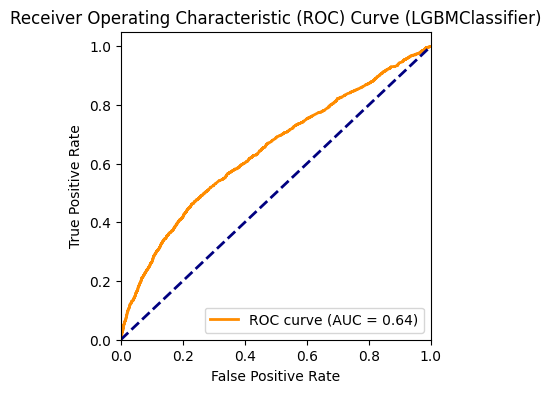

<IPython.core.display.Javascript object>

In [8]:
model = LGBMClassifier(n_jobs=-1, class_weight="balanced", use_missing=False)
final_pipe = Pipeline(steps=[("model", model)])


final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
y_pred_prob = final_pipe.predict_proba(X_test)[:, 1]
print("\n\n\nProbability: ", y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\n\n\nROC_AUC score: ", roc_auc)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (LGBMClassifier)")
plt.legend(loc="lower right")
plt.show()

<Figure size 800x800 with 0 Axes>

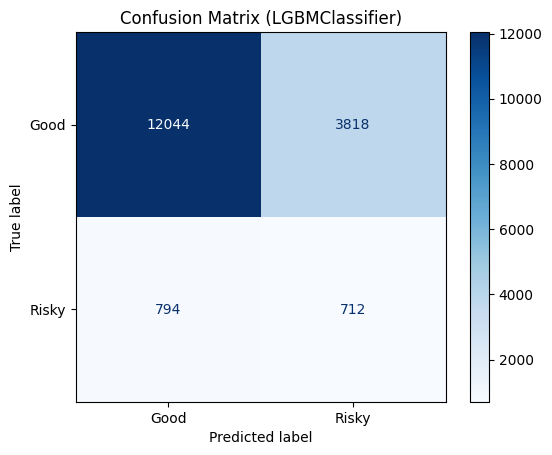

Classification report (LGBMClassifier):
---------------------------
               precision    recall  f1-score   support

        Good       0.94      0.76      0.84     15862
       Risky       0.16      0.47      0.24      1506

    accuracy                           0.73     17368
   macro avg       0.55      0.62      0.54     17368
weighted avg       0.87      0.73      0.79     17368



<IPython.core.display.Javascript object>

In [9]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["Good", "Risky"])
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_pipe.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.xticks(np.arange(2), ["Good", "Risky"])
plt.yticks(np.arange(2), ["Good", "Risky"])
plt.title("Confusion Matrix (LGBMClassifier)")
plt.show()
print("Classification report (LGBMClassifier):\n---------------------------\n", clr)

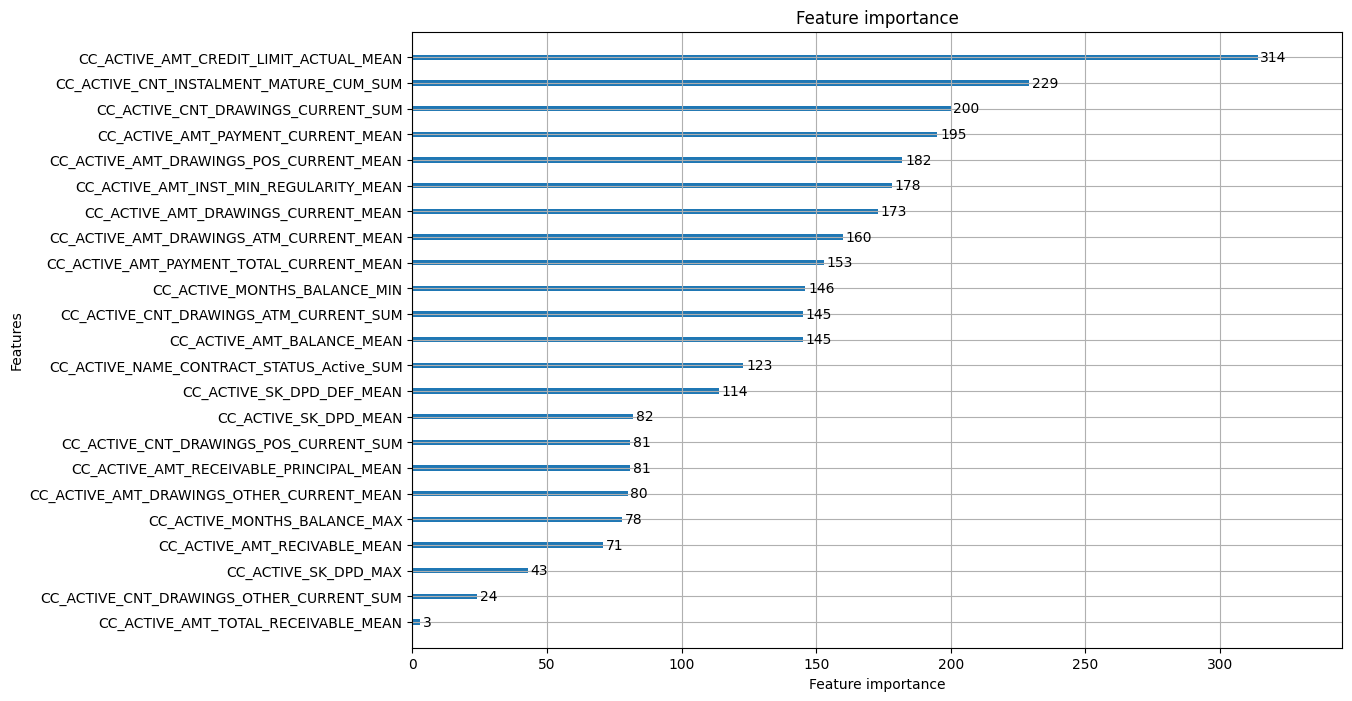

<IPython.core.display.Javascript object>

In [10]:
model_lgb = final_pipe.named_steps["model"]
lgb.plot_importance(model_lgb, figsize=(12, 8), max_num_features=40)
plt.show()

In [11]:
feature_imp = pd.DataFrame(
    sorted(zip(model_lgb.feature_importances_, X_train.columns)),
    columns=["Value", "Feature"],
)
features_df_ccb = feature_imp.sort_values(by="Value", ascending=False)
selected_features_ccb = list(features_df_ccb[features_df_ccb["Value"] >= 50]["Feature"])
selected_features_ccb

['CC_ACTIVE_AMT_CREDIT_LIMIT_ACTUAL_MEAN',
 'CC_ACTIVE_CNT_INSTALMENT_MATURE_CUM_SUM',
 'CC_ACTIVE_CNT_DRAWINGS_CURRENT_SUM',
 'CC_ACTIVE_AMT_PAYMENT_CURRENT_MEAN',
 'CC_ACTIVE_AMT_DRAWINGS_POS_CURRENT_MEAN',
 'CC_ACTIVE_AMT_INST_MIN_REGULARITY_MEAN',
 'CC_ACTIVE_AMT_DRAWINGS_CURRENT_MEAN',
 'CC_ACTIVE_AMT_DRAWINGS_ATM_CURRENT_MEAN',
 'CC_ACTIVE_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
 'CC_ACTIVE_MONTHS_BALANCE_MIN',
 'CC_ACTIVE_CNT_DRAWINGS_ATM_CURRENT_SUM',
 'CC_ACTIVE_AMT_BALANCE_MEAN',
 'CC_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM',
 'CC_ACTIVE_SK_DPD_DEF_MEAN',
 'CC_ACTIVE_SK_DPD_MEAN',
 'CC_ACTIVE_CNT_DRAWINGS_POS_CURRENT_SUM',
 'CC_ACTIVE_AMT_RECEIVABLE_PRINCIPAL_MEAN',
 'CC_ACTIVE_AMT_DRAWINGS_OTHER_CURRENT_MEAN',
 'CC_ACTIVE_MONTHS_BALANCE_MAX',
 'CC_ACTIVE_AMT_RECIVABLE_MEAN']

<IPython.core.display.Javascript object>

In [24]:
ccb_selected = ccb_target_copy[["SK_ID_CURR"] + selected_features_ccb]
ccb_selected.to_csv(
    "credit_card_selected_features.csv",
    index=False,
    quoting=QUOTE_NONNUMERIC,
    quotechar='"',
)
ccb_selected.head()

,SK_ID_CURR,CC_ACTIVE_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_ACTIVE_CNT_INSTALMENT_MATURE_CUM_SUM,CC_ACTIVE_CNT_DRAWINGS_CURRENT_SUM,CC_ACTIVE_AMT_PAYMENT_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_ACTIVE_AMT_INST_MIN_REGULARITY_MEAN,CC_ACTIVE_AMT_DRAWINGS_CURRENT_MEAN,CC_ACTIVE_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_ACTIVE_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_ACTIVE_MONTHS_BALANCE_MIN,CC_ACTIVE_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_ACTIVE_AMT_BALANCE_MEAN,CC_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,CC_ACTIVE_SK_DPD_DEF_MEAN,CC_ACTIVE_SK_DPD_MEAN,CC_ACTIVE_CNT_DRAWINGS_POS_CURRENT_SUM,CC_ACTIVE_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_ACTIVE_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_ACTIVE_MONTHS_BALANCE_MAX,CC_ACTIVE_AMT_RECIVABLE_MEAN
0,100006,270000.0000,0.0,0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-6,0.0,0.000000,6.0,0.0,0.0,0.0,0.000000,0.0,-1,0.000000
1,100011,164189.1875,1881.0,4,4843.063965,0.0,3956.0,2432.432373,2432.432373,4520.067383,-75,4.0,54482.113281,74.0,0.0,0.0,0.0,52402.085938,0.0,-2,54433.179688
2,100021,675000.0000,0.0,0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-18,0.0,0.000000,7.0,0.0,0.0,0.0,0.000000,0.0,-12,0.000000
3,100023,135000.0000,0.0,0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-11,0.0,0.000000,8.0,0.0,0.0,0.0,0.000000,0.0,-4,0.000000
4,100036,78750.0000,0.0,0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-13,0.0,0.000000,12.0,0.0,0.0,0.0,0.000000,0.0,-2,0.000000


<IPython.core.display.Javascript object>

In [13]:
# Other models:
final_pipe_rf = Pipeline(
    steps=[("model", RandomForestClassifier(n_jobs=-1, class_weight="balanced"))]
)
final_pipe_rf.fit(X_train, y_train)
y_pred = final_pipe_rf.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
y_pred_prob_rf = final_pipe_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("RandomForest ROC AUC:", roc_auc_rf)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     15862
         1.0       0.06      0.02      0.03      1506

    accuracy                           0.88     17368
   macro avg       0.48      0.49      0.48     17368
weighted avg       0.84      0.88      0.86     17368

RandomForest ROC AUC: 0.5913942054670402


<IPython.core.display.Javascript object>

In [14]:
final_pipe_xgb = Pipeline(steps=[("model", XGBClassifier(n_jobs=-1))])
final_pipe_xgb.fit(X_train, y_train)
y_pred_xgb = final_pipe_xgb.predict(X_test)
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", report_xgb)

y_pred_prob_xgb = final_pipe_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print("XGBoost ROC AUC:", roc_auc_xgb)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     15862
         1.0       0.33      0.01      0.02      1506

    accuracy                           0.91     17368
   macro avg       0.62      0.51      0.49     17368
weighted avg       0.86      0.91      0.87     17368

XGBoost ROC AUC: 0.6376545681268537


<IPython.core.display.Javascript object>

In [18]:
ccb_selected.isna().sum()

SK_ID_CURR                                   0
TARGET                                       0
CC_ACTIVE_AMT_CREDIT_LIMIT_ACTUAL_MEAN       0
CC_ACTIVE_CNT_INSTALMENT_MATURE_CUM_SUM      0
CC_ACTIVE_CNT_DRAWINGS_CURRENT_SUM           0
CC_ACTIVE_AMT_PAYMENT_CURRENT_MEAN           0
CC_ACTIVE_AMT_DRAWINGS_POS_CURRENT_MEAN      0
CC_ACTIVE_AMT_INST_MIN_REGULARITY_MEAN       0
CC_ACTIVE_AMT_DRAWINGS_CURRENT_MEAN          0
CC_ACTIVE_AMT_DRAWINGS_ATM_CURRENT_MEAN      0
CC_ACTIVE_AMT_PAYMENT_TOTAL_CURRENT_MEAN     0
CC_ACTIVE_MONTHS_BALANCE_MIN                 0
CC_ACTIVE_CNT_DRAWINGS_ATM_CURRENT_SUM       0
CC_ACTIVE_AMT_BALANCE_MEAN                   0
CC_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM    0
CC_ACTIVE_SK_DPD_DEF_MEAN                    0
CC_ACTIVE_SK_DPD_MEAN                        0
CC_ACTIVE_CNT_DRAWINGS_POS_CURRENT_SUM       0
CC_ACTIVE_AMT_RECEIVABLE_PRINCIPAL_MEAN      0
CC_ACTIVE_AMT_DRAWINGS_OTHER_CURRENT_MEAN    0
CC_ACTIVE_MONTHS_BALANCE_MAX                 0
CC_ACTIVE_AMT

<IPython.core.display.Javascript object>

In [21]:
s = pd.read_csv("credit_card_selected_features.csv")
s.isna().sum()
s.shape

(86838, 22)

<IPython.core.display.Javascript object>